In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Load the iris dataset

In [20]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/2023-CV&DL/Machine Learning/iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


# Create a dataframe of feature and a dataframe of label

In [21]:
#dataframe of feature
df_feature=df.loc[:, ["sepal.length",	"sepal.width", "petal.length","petal.width"]]

In [22]:
#df_feature.head()

In [23]:
#dataframe of label
df_label=df.loc[:, ["variety"]]

In [8]:
#df_label.head()

# Manual Hyperparameters tuning

*  Splitting training/testing 
*  Freezing the test set
*  Spitting training/validation (to retrieve a validation set for hyperparameters tuning)
*  Defining hyperparameters to be tuned (in this case 2 and 2 hyperparameters)
*  Initializing 4 classifiers with the 4 combination of hyperparameters
*  Training the 4 classifiers
*  Testing the 4 classifiers performance on the validation set
*  Choosing the best combination of hyperparameters 















In [24]:
# Train/Test split (10% of the training dataset will be used for testing)
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_label, test_size = .10)

In [25]:
print("original set len", len(df_feature))
print("training set len", len(x_train))
print("test set len", len(x_test))

original set len 150
training set len 135
test set len 15


In [26]:
# Train/Test split (20% of the new training dataset will be used for validation)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=.20)

In [27]:
print("training set new len", len(x_train))
print("valid set len", len(x_valid))

training set new len 108
valid set len 27


Training the different classifiers (i.e., the same classifier with different combinantion of hyperparameters) 

In [ ]:
#we want to tune the following hyperparameters 
#n_estimators=100,200
#max_depth=2,3

In [28]:
clf1 = RandomForestClassifier(n_estimators = 100, max_depth = 2)
clf2 = RandomForestClassifier(n_estimators = 100, max_depth = 3)
clf3 = RandomForestClassifier(n_estimators = 200, max_depth = 2)
clf4 = RandomForestClassifier(n_estimators = 200, max_depth = 3)

In [29]:
trainedclf1=clf1.fit(x_train, y_train)
trainedclf2=clf2.fit(x_train, y_train)
trainedclf3=clf3.fit(x_train, y_train)
trainedclf4=clf4.fit(x_train, y_train)

Validating the best classifier (i.e., the one with the best combination of hyperparameters (i.e., the one with the highest performance on the validation set))

In [30]:
prediction1=trainedclf1.predict(x_valid)
prediction2=trainedclf2.predict(x_valid)
prediction3=trainedclf3.predict(x_valid)
prediction4=trainedclf4.predict(x_valid)

In [31]:
print(accuracy_score(y_valid, prediction1))
print(accuracy_score(y_valid, prediction2))
print(accuracy_score(y_valid, prediction3))
print(accuracy_score(y_valid, prediction4))

0.9259259259259259
0.9259259259259259
0.9259259259259259
0.9259259259259259


#We finally test the performance of the best classifier after hyperparameters tuning on the test set 

In [32]:
predictiontestset=trainedclf1.predict(x_test)

In [33]:
print(accuracy_score(y_test, predictiontestset))

1.0


# Predictions

1.0


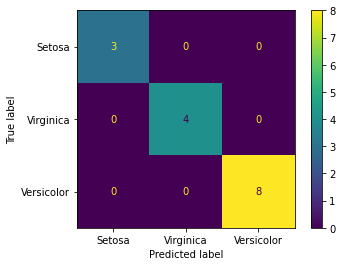

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictiontestset=trainedclf1.predict(x_test)

# Calculate the accuracy
print(accuracy_score(y_test, predictiontestset))

#confusion matrix 
classes=["Setosa", "Virginica", "Versicolor"]
cm = confusion_matrix(y_test, predictiontestset, labels=classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=classes)

cmd.plot()

# Hyperparameters tuning: a more complex but accepted scenario

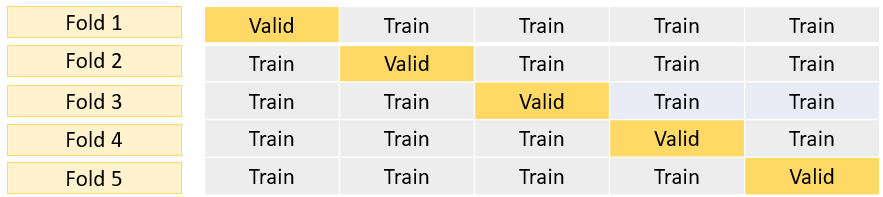

In [35]:
# configure the cross-validation procedure 
loop = KFold(n_splits=3, shuffle=True, random_state=1)
  
# define the model
clf = RandomForestClassifier()

# define search space
grid = dict()
grid['n_estimators'] = [10, 100, 500]
grid['max_depth'] = [2, 4, 6]

# define search for hyperparameters tuning 
search = GridSearchCV(clf, grid, scoring='accuracy', cv=loop)

# execute search
result = search.fit(x_train, y_train)

# get the best performing model fit on the whole training dataset (i.e., the one with the best hyperparameters)
best_model = result.best_estimator_
print("the best model is ", best_model)

#predictions on the test set
predictions=best_model.predict(x_test)
print("the accuracy is ", accuracy_score(y_test,predictions))

the best model is  RandomForestClassifier(max_depth=4, n_estimators=10)
the accuracy is  0.9333333333333333


In [36]:
# A global overview of cross validation
search.cv_results_ 

{'mean_fit_time': array([0.02325726, 0.17222929, 0.88363727, 0.02356744, 0.17919374,
        0.87664429, 0.02243678, 0.17429829, 0.9585789 ]),
 'std_fit_time': array([0.00392399, 0.00197681, 0.00949597, 0.00136998, 0.00381893,
        0.00482543, 0.00026263, 0.00258311, 0.11491583]),
 'mean_score_time': array([0.00453766, 0.0149219 , 0.06232031, 0.00479436, 0.01468245,
        0.07764459, 0.00557764, 0.01467903, 0.06775935]),
 'std_score_time': array([0.00021921, 0.00109708, 0.00855222, 0.0001262 , 0.00015566,
        0.00263951, 0.00119745, 0.00070899, 0.01113089]),
 'param_max_depth': masked_array(data=[2, 2, 2, 4, 4, 4, 6, 6, 6],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 100, 500, 10, 100, 500, 10, 100, 500],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_v

In [37]:
#print keys of interest for viewing hyperparamenters.
print(search.cv_results_['params'])
print(search.cv_results_['mean_test_score']) #mean of performance of each fold to discriminate hyperparameters

[{'max_depth': 2, 'n_estimators': 10}, {'max_depth': 2, 'n_estimators': 100}, {'max_depth': 2, 'n_estimators': 500}, {'max_depth': 4, 'n_estimators': 10}, {'max_depth': 4, 'n_estimators': 100}, {'max_depth': 4, 'n_estimators': 500}, {'max_depth': 6, 'n_estimators': 10}, {'max_depth': 6, 'n_estimators': 100}, {'max_depth': 6, 'n_estimators': 500}]
[0.94444444 0.94444444 0.94444444 0.96296296 0.96296296 0.9537037
 0.9537037  0.9537037  0.9537037 ]
